In [15]:
import numpy as np
from scipy import stats 
from matplotlib import pyplot as plt
import pymc3 as pm
import arviz as az
from IPython.display import display

In [6]:
rng = np.random.default_rng(0)

In [65]:
trials = 40
theta_real = 0.35
data = stats.bernoulli.rvs(p=theta_real, size=trials)

In [66]:
data

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [67]:
with pm.Model() as my_first_model:
    θ = pm.Beta("θ", alpha=1, beta=1)
    y = pm.Bernoulli('y', p=θ, observed=data)
    trace = pm.sample(
        1_000,
        random_seed=123,
        return_inferencedata=False
    )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [θ]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2 seconds.


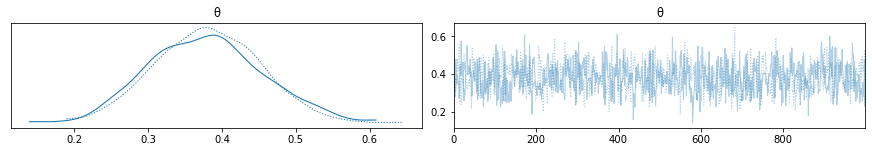

In [68]:
with my_first_model:
    az.plot_trace(trace);

In [69]:
with my_first_model:
    display(az.summary(trace))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
θ,0.38,0.073,0.25,0.521,0.002,0.002,892.0,1279.0,1.0


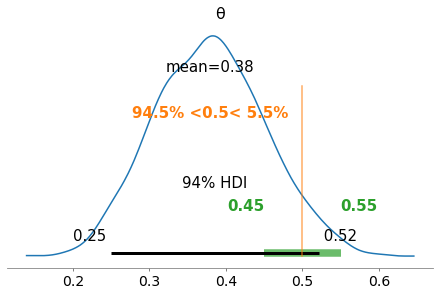

In [71]:
with my_first_model:
    az.plot_posterior(
        trace,
        rope=[0.45, 0.55],
        ref_val=0.5
    );

In [72]:
with my_first_model:
    θ_pos = trace["θ"]

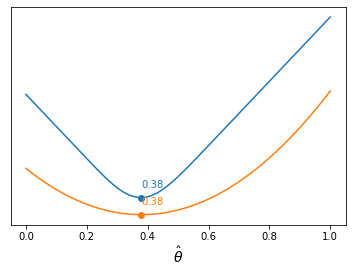

In [73]:
grid = np.linspace(0, 1, 1_000)
lossf_a = np.mean(
    np.abs(grid[:, None] - θ_pos[None, :]),
    axis=1
)
lossf_b = np.mean(
    np.power(grid[:, None] - θ_pos[None, :], 2),
    axis=1
)
for lossf, c in zip([lossf_a, lossf_b], ["C0", "C1"]):
    min_idx = np.argmin(lossf)
    plt.plot(grid, lossf, color=c)
    plt.plot(grid[min_idx], lossf[min_idx], "o", color=c)
    plt.annotate(
        f"{grid[min_idx]:.2f}",
        (grid[min_idx], lossf[min_idx] + 0.03),
        color=c
    )
    plt.yticks([])
    plt.xlabel(r"$\hat{\theta}$", fontsize=14)

In [80]:
np.median(θ_pos), np.mean(θ_pos)

(0.37857151649281373, 0.3795633808818875)

In [83]:
data = np.loadtxt(
    "BAP/code/data/chemical_shifts.csv"
)

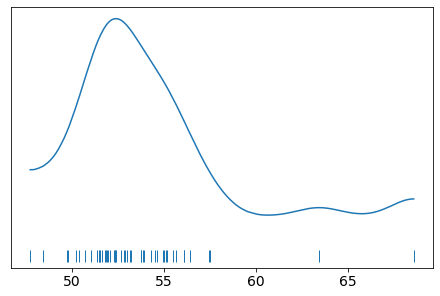

In [90]:
az.plot_kde(data, rug=True)
plt.yticks([]);